<a href="https://colab.research.google.com/github/PhanQuangHuy123/B-i-1_AI_-Phan-Quang-Huy-20146254/blob/main/W4_25_02_23.fuzzyipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


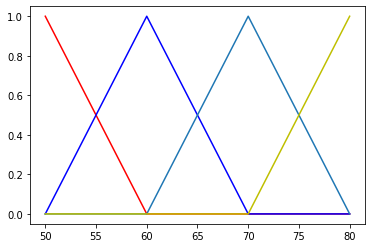

In [10]:
import numpy as np 
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange (50,81,1)
slow = fuzz .trimf(x,[50,50,60])
medium = fuzz.trimf(x,[50,60,70])
medium_fast = fuzz.trimf(x,[60,70,80])
full_speed = fuzz.trimf(x,[70,80,80])
plt.figure()
plt.plot(x,slow,'r',linewidth = 1.5, label="slow")
plt.plot(x,medium,'b',linewidth = 1.5, label="slow")
plt.plot(x,medium_fast,linewidth = 1.5, label="slow")
plt.plot(x,full_speed,'y',linewidth = 1.5, label="slow")

18.24390243902438


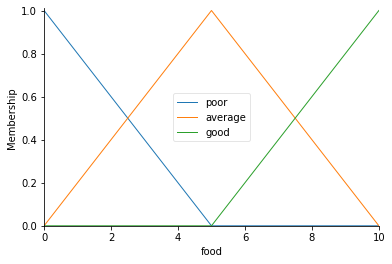

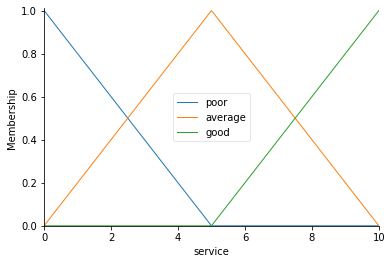

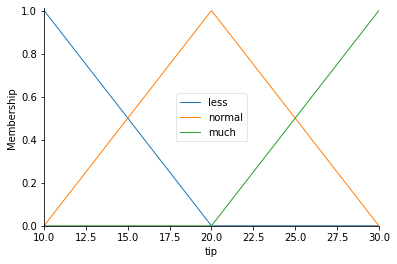

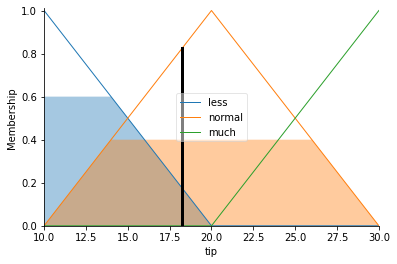

In [30]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,11,1),"food")
service = ctrl.Antecedent(np.arange(0,11,1),"service")
tip = ctrl.Consequent(np.arange(10,31,1),"tip")

food['poor']= fuzz.trimf(food.universe,[0,0,5])
food['average']= fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])
service['poor']= fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])
tip['less']=fuzz.trimf(tip.universe,[0,10,20])
tip['normal']=fuzz.trimf(tip.universe,[10,20,30])
tip['much']=fuzz.trimf(tip.universe,[20,30,30])
food.view()
service.view()
tip.view()
service['average'].view

rule1 = ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2 = ctrl.Rule(food['poor']&service['average'],tip['less'])
rule3 = ctrl.Rule(food['poor']&service['good'],tip['normal']) 
rule4 = ctrl.Rule(food['average']&service['poor'],tip['less'])
rule5 = ctrl.Rule(food['average']&service['average'],tip['normal'])
rule6 = ctrl.Rule(food['average']&service['good'],tip['normal']) 
rule7 = ctrl.Rule(food['good']&service['poor'],tip['normal'])
rule8 = ctrl.Rule(food['good']&service['average'],tip['much'])
rule9 = ctrl.Rule(food['good']&service['good'],tip['much'])  


#
tipping_ctrl = ctrl.ControlSystem([rule1 , rule2 , rule3 , rule4 , rule5 , rule6 , rule7 , rule8 ,rule9])
tipping  = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=5
tipping.input['service']=2
tipping .compute()
print(tipping.output['tip'])
tip.view(sim=tipping)
                                  

                          